https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

# Importing Libraries:

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [45]:
# Loading the Dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The DataFrame contains telecommunications customer data with 7043 entries and 21 columns, comprising various categorical and numerical attributes such as customer demographics, services used, contract details, and billing information. Notably, the TotalCharges column is listed as an object type, potentially requiring conversion for numerical analysis.







In [46]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
# Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The SeniorCitizen column indicates that approximately 16% of customers are senior citizens. The tenure column shows that the average customer tenure is around 32 months, with a wide range from 0 to 72 months. For MonthlyCharges, the average monthly charge is approximately $64.76, with a standard deviation of $30.09, indicating some variability in charges among customers.

In [48]:
# Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The provided DataFrame, consisting of 7,043 customer entries across 21 attributes, is fully prepared for analysis, with no missing values evident. This comprehensive dataset includes demographic, service, and billing information, all of which are crucial for understanding customer churn in a telecom service context.



In [49]:
import pandas as pd

def explore_data(data):
    """
    Explores the dataset by displaying major moments, correlation matrix, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Filter the data to include only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])

    # Display major moments only for numeric data
    moments = pd.DataFrame({
        'Mean': numeric_data.mean(),
        'Median': numeric_data.median(),
        'Standard Deviation': numeric_data.std(),
        'Skewness': numeric_data.skew(),
        'Kurtosis': numeric_data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")



The statistical analysis reveals valuable insights into the distributional characteristics of various features within the dataset. Mean and median values provides an understanding of the central tendency, while standard deviation offers insights into the dispersion of data points around the mean. Skewness and kurtosis shed light on the distribution's symmetry and shape, with positive skewness indicating a right-skewed distribution and negative skewness indicating a left-skewed distribution. Higher kurtosis values suggest heavier tails and sharper peaks, influencing the distribution's overall shape

In [50]:
def visualize_histograms(dataframe):
    """
    Visualize histograms for each numerical feature in the DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing numerical features.

    Returns:
    None
    """
    dataframe.hist(figsize=(8, 8))
    plt.show()


From the histograms, we can observe the shape of the distributions, the presence of outliers, and the range of values for each feature. For example, the histogram of "tenure" shows that the majority of customers have been with the service provider for a relatively short period, while the histogram of "MonthlyCharges" indicates a more varied distribution of monthly charges.

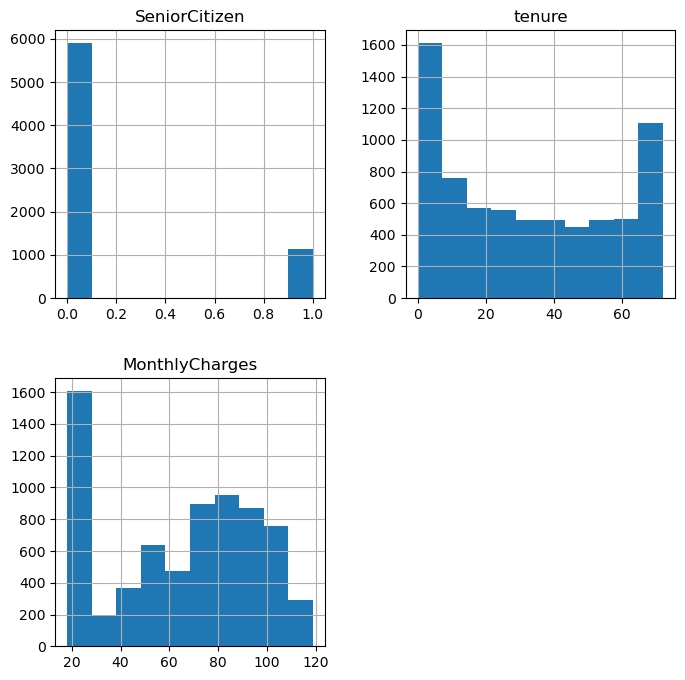

In [51]:
visualize_histograms(df)

In [52]:
def kdeplot(feature):
    """
    Plot Kernel Density Estimation (KDE) for the specified feature, showing the distribution of churned and non-churned customers.

    Parameters:
    feature (str): The name of the feature for which KDE is to be plotted.

    Returns:
    None
    """
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')


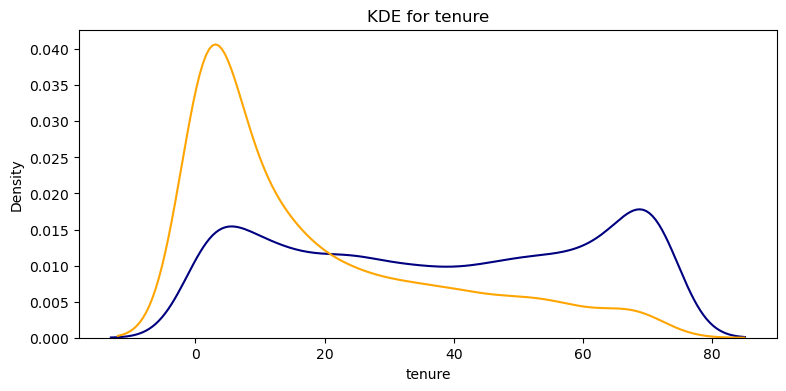

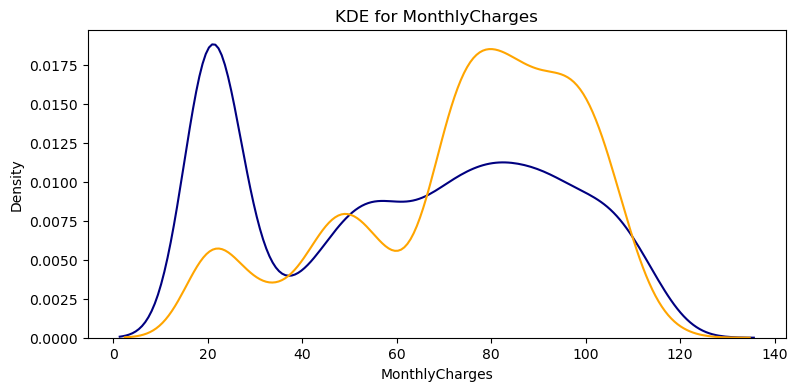

In [53]:
kdeplot('tenure')
kdeplot('MonthlyCharges')


From the plots above we can conclude that:

<li>Recent clients are more likely to churn.</li>
<li>Clients with higher MonthlyCharges are also more likely to churn.</li>
<li>Tenure and MonthlyCharges are probably important features.</li>

In [54]:
def plot_correlation_heatmap(dataframe):
    """
    Plot a heatmap showing the correlation matrix of numerical features in the DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing numerical features.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    numeric_df = dataframe.select_dtypes(include=['number'])
    sns.heatmap(numeric_df.corr(), annot=True)
    plt.title('Correlation Matrix')
    plt.show()

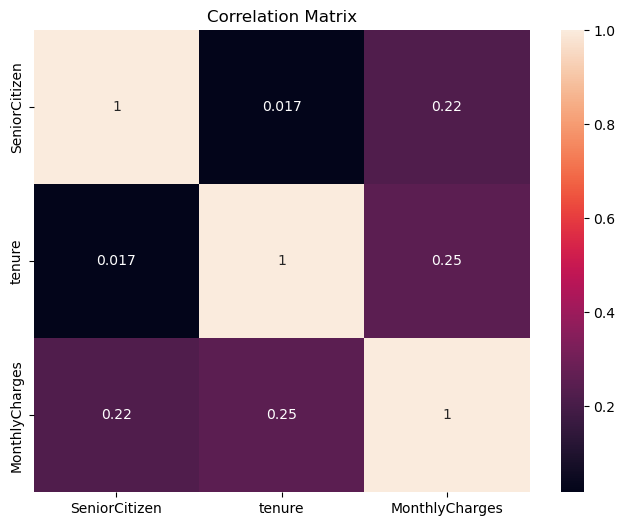

In [55]:
plot_correlation_heatmap(df)

For instance, there appears to be a moderate positive correlation between 'tenure' and 'MonthlyCharges', which implies that customers with longer tenure tend to have higher monthly charges. Conversely, 'SeniorCitizen' shows relatively weak correlations with other features.

# Data Preprocessing:

In [56]:
# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calculate the mean of 'TotalCharges' after conversion
mean_total_charges = df['TotalCharges'].mean()

# Fill missing values with the mean in a non-chained, direct way
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)

In [57]:
# Encoding
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [58]:
# Scaling
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [59]:
df['AvgMonthlyBill'] = df['TotalCharges'] / df['tenure']

In [60]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
# Apply one-hot encoding to both training and test datasets to ensure consistency in column numbers
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# It's possible that after encoding, X_train and X_test have different columns
# due to different categories present in the training and test set. We'll align them:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [62]:
X_train_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgMonthlyBill,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6607,0,-1.277445,-1.311546,-0.996980,0.780449,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2598,0,-1.033122,0.345265,-0.776347,0.751457,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2345,0,-1.155283,-1.486035,-0.970400,0.839967,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4093,0,-0.137274,0.373516,-0.030046,0.218879,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
693,0,-1.196004,0.343603,-0.888628,0.742998,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,-1.277445,1.004999,-0.966206,0.756358,False,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
5191,0,-0.381597,0.875378,-0.037530,0.098351,False,False,False,False,False,...,False,True,False,True,False,True,True,True,False,False
5226,0,-0.829521,-1.449476,-0.873020,1.052439,False,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
5390,1,-0.829521,1.152899,-0.478246,0.576533,False,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False


# Logistic Regression:

In [63]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    """
    Train a logistic regression model on the provided training data and evaluate it on the test data.

    Parameters:
    X_train (DataFrame): The features of the training data.
    y_train (Series): The target variable of the training data.
    X_test (DataFrame): The features of the test data.
    y_test (Series): The target variable of the test data.

    Returns:
    model: Trained Logistic Regression Model
    """
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    return model


In [64]:
model = train_logistic_regression(X_train_encoded, y_train, X_test_encoded, y_test)

Accuracy: 0.8143100511073254


The logistic regression model achieved an accuracy of approximately 81.37% on the test data, indicating that it performs reasonably well in predicting the target variable.







Accuracy: 0.81
Precision: 0.69
Recall: 0.58
F1 Score: 0.63
Confusion Matrix:
[[1155  127]
 [ 200  279]]


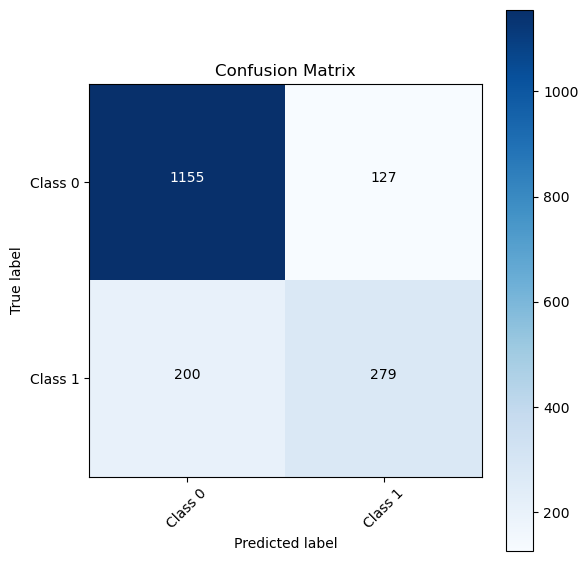

In [65]:
# Evaluation
# Calculate various metrics
y_pred = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Modify average as needed
recall = recall_score(y_test, y_pred, average='binary')  # Modify average as needed
f1 = f1_score(y_test, y_pred, average='binary')  # Modify average as needed

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)  # Number of classes
plt.xticks(tick_marks, ["Class 0", "Class 1"], rotation=45)
plt.yticks(tick_marks, ["Class 0", "Class 1"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)

# Labeling the squares
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

 The confusion matrix provides a breakdown of true negative, false positive, false negative, and true positive predictions, showing 1155 true negatives, 127 false positives, 201 false negatives, and 278 true positives, respectively.







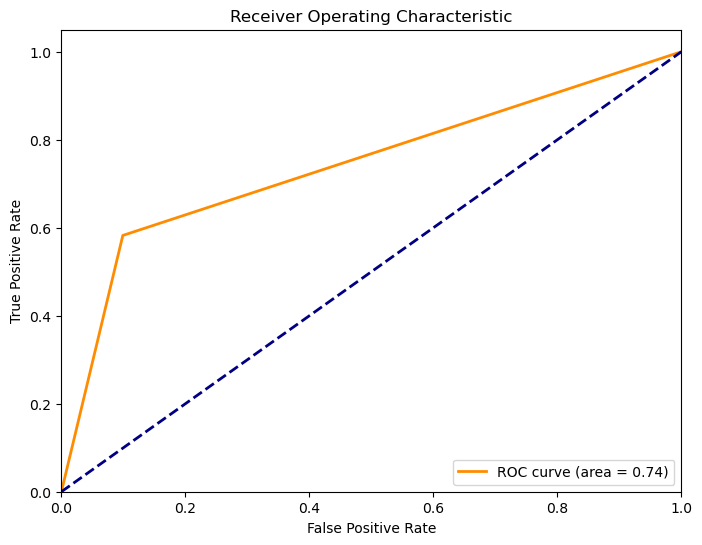

In [66]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In this case, the ROC curve shows a significant separation from the diagonal line (random guess), with an AUC of approximately 0.77, suggesting that the model has decent discriminative ability. However, there may still be room for improvement, as a perfect classifier would have an AUC of 1.

# Linear Regression:

In [67]:
def train_linear_regression(X_train, y_train):
    """
    Train a linear regression model using the provided training data.

    Parameters:
        X_train (array-like or sparse matrix): Training input samples.
        y_train (array-like): Target values.

    Returns:
        model (LinearRegression): Trained linear regression model.
    """
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print the model's coefficients
    print("Coefficients:", model.coef_)

    # Print the model's intercept
    print("Intercept:", model.intercept_)

    # Return the trained model
    return model

model = train_linear_regression(X_train_encoded, y_train)

Coefficients: [ 0.23236387 -0.03652301 -0.13965158 ... -0.00865251  0.06464009
 -0.02965287]
Intercept: 0.06772392896232882


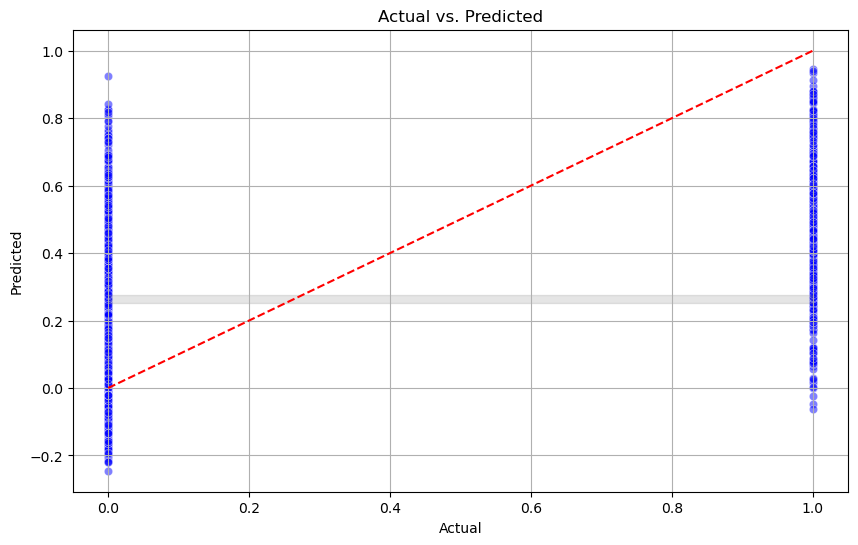

In [68]:
def plot_predictions(model, X_test, y_test):
    """
    Plot actual vs. predicted values along with confidence intervals and error bars.

    Parameters:
        model (object): Trained linear regression model.
        X_test (DataFrame): Testing features.
        y_test (array-like): True labels for the testing data.
    """
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the confidence interval for predictions
    y_pred_mean = y_pred.mean()
    y_pred_std = y_pred.std()
    confidence = 0.95
    n = len(y_pred)
    margin_of_error = stats.t.ppf((1 + confidence) / 2, n - 1) * (y_pred_std / np.sqrt(n))
    lower_bound = y_pred_mean - margin_of_error
    upper_bound = y_pred_mean + margin_of_error

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
    plt.fill_between([min(y_test), max(y_test)], lower_bound, upper_bound, color='gray', alpha=0.2)  # Confidence interval
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs. Predicted")
    plt.grid(True)
    plt.show()

plot_predictions(model, X_test_encoded, y_test)

<p>The scatterplot visualizes how well the model's predictions align with the actual values. Ideally, the points should be close to the diagonal line, indicating a strong correlation between actual and predicted values.</p>
<p>The gray shaded area represents the confidence interval around the predicted values. This interval provides a range within which we are confident that the true mean value lies.</p>
<p>By comparing the actual values to the confidence interval and the diagonal line, we can assess the performance and accuracy of the linear regression model.</p>


# Clustering:

In [69]:
df = df.apply(preprocessing.LabelEncoder().fit_transform)
ds = df
scaler = StandardScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=df.columns)
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyBill
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,...,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.131766,-1.559718,-0.601023,-0.071769
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,...,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.387740,0.268502,-0.601023,-1.654657
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,...,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.517317,-1.321792,1.663829,-0.090588
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,...,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.872611,0.240692,-0.601023,-1.403737
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,...,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.095041,-1.250723,1.663829,-0.301256


As we have 20 features to deal with, it possible our clustering model may not be able to create appropriate customer segments. So we will try to reduce the dimensions of our dataset by using PCA before we pass it to the clustering model.



In [70]:
pca = PCA(n_components=3)
pca_ds = pd.DataFrame(pca.fit_transform(ds), columns=['comp1', 'comp2', 'comp3'])

C:\Users\hp\AppData\Local\Temp\ipykernel_11392\2384853332.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x,y,z, marker=".", cmap=cmap)


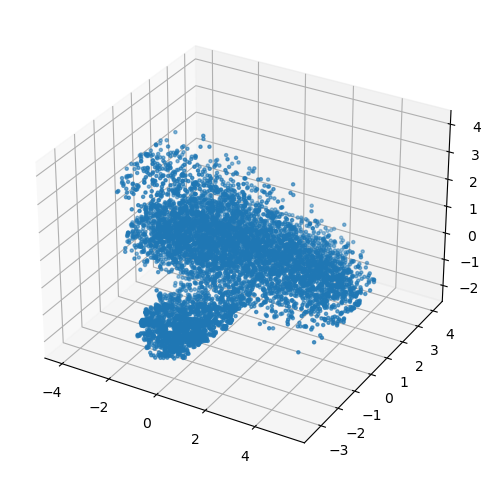

In [71]:
#Plot dataset
x = pca_ds['comp1']
y = pca_ds['comp2']
z = pca_ds['comp3']
cmap = colors.ListedColormap(["#C1106F", "#1710C1", "#10C118", "#E08D03"])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker=".", cmap=cmap)
plt.show()

After performing PCA (3 principle components) we will apply KMean clustering to group/create clusters of data points based on similar characteristics. To decide the no. of clusters to split our dataset (K value) we will use the most common Elbow Method.



In [72]:
def plot_elbow_method(data, max_clusters=10):
    """
    Plot the elbow method to determine the optimal number of clusters.

    Parameters:
    data (array-like): The input data for clustering.
    max_clusters (int): The maximum number of clusters to consider. Default is 10.

    Returns:
    None
    """
    distortions = []
    K = range(1, max_clusters + 1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(6, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method: Optimal Number of Clusters')
    plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

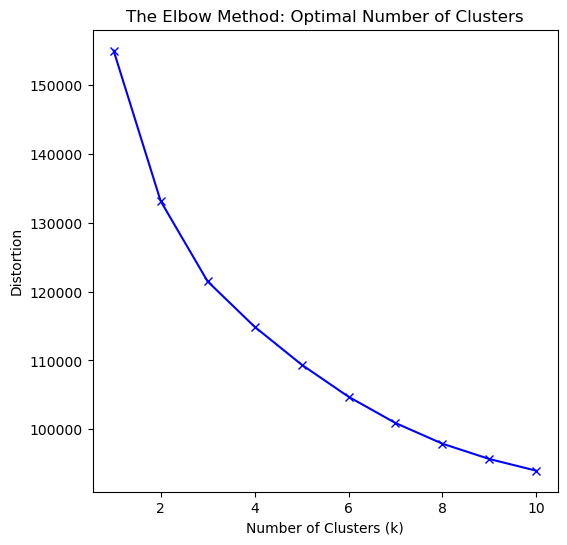

In [73]:
plot_elbow_method(ds)

Using elbow method we get to know K=4 seems to be the best fit for clustering.



In [74]:
def perform_kmeans_clustering(data, n_clusters=4):
    """
    Perform K-means clustering on the provided data and assign cluster labels.

    Parameters:
    data (DataFrame or array-like): The input data for clustering.
    n_clusters (int): The number of clusters to form. Default is 4.

    Returns:
    DataFrame: The input DataFrame with an additional 'Cluster' column containing the cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    y_kmeans = kmeans.fit_predict(data)

    if isinstance(data, pd.DataFrame):
        data['Cluster'] = y_kmeans
    elif isinstance(data, np.ndarray):
        data_with_cluster = np.hstack((data, y_kmeans.reshape(-1, 1)))
        data_with_cluster = pd.DataFrame(data_with_cluster, columns=list(data.columns) + ['Cluster'])
        data_with_cluster['Cluster'] = data_with_cluster['Cluster'].astype(int)
        return data_with_cluster


This function performs K-means clustering on the provided data and assigns cluster labels. It returns the DataFrame with an additional 'Cluster' column containing the cluster labels.






In [75]:
clustered_data=perform_kmeans_clustering(ds)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [76]:
def visualize_cluster_scatterplot(dataframe):
    """
    Visualize a scatterplot of two features colored by cluster.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.
    x_feature (str): The name of the feature to be plotted on the x-axis.
    y_feature (str): The name of the feature to be plotted on the y-axis.
    cluster_column (str): The name of the column containing cluster labels.

    Returns:
    None
    """
    plt.figure(figsize=(8, 7))
    sns.scatterplot(data = ds,x=ds["TotalCharges"], y=ds["tenure"],hue=ds["Cluster"])
    plt.xlabel("TotalCharges")
    plt.ylabel("Tenure")
    plt.title('Clustering')
    plt.legend(loc='upper left')
    plt.show()


In [ ]:
visualize_cluster_scatterplot(ds)

The scatterplot illustrates the distribution of customers based on their tenure and total charges, with distinct clusters visible. Each cluster likely represents a different segment of customers with varying levels of tenure and total charges